In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import seaborn as sns

In [213]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# DATA

In [214]:
#data = pd.read_csv('../data/corporate_rating.csv')

In [215]:
data = pd.read_csv('../data/df_new.csv')

In [216]:
data['divyield'] = data['divyield'].str.replace('%', '').astype(float)

# EDA

In [217]:
print("The credit rating dataset has", data.shape[0], "records, each with", data.shape[1],
    "attributes")

The credit rating dataset has 6092 records, each with 75 attributes


In [218]:
data.Rating.value_counts()

Rating
BBB+    1189
BBB     1186
A        759
A+       714
A-       711
BBB-     504
AA-      331
BB+      214
AA       178
BB       173
AA+       61
BB-       46
AAA       26
Name: count, dtype: int64

In [219]:

# rating_dict = {'AAA':'Lowest Risk', 
#                'AA+':'Low Risk',
#                'AA':'Low Risk',
#                'AA-':'Low Risk',
#                'A+':'Low Risk',
#                'A':'Medium Risk',
#                'A-':'Medium Risk',
#                'BBB+':'Medium Risk', 
#                'BBB':'Medium Risk', 
#                'BBB-':'High Risk', 
#                'BB+':'High Risk', 
#                'BB':'Highest Risk',
#                'BB-':'Highest Risk',
#                'B+':'In Default'}

# data.Rating = data.Rating.map(rating_dict)

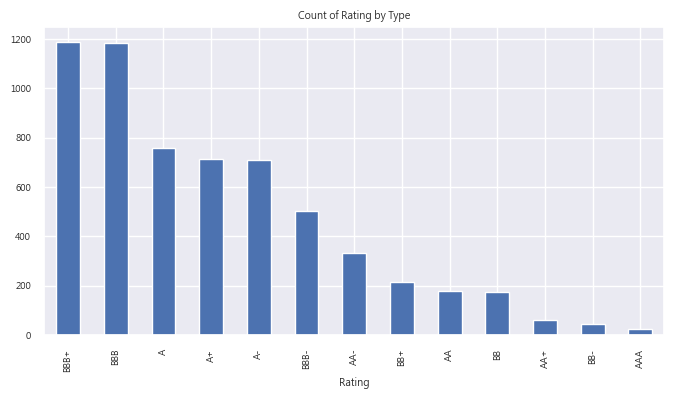

In [220]:
ax = data['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True)

將lwoer risk跟in default篩掉，因為他們樣本數太少了

In [221]:
data = data[data['Rating']!='B+']  # filter In Default
data.reset_index(inplace = True, drop=True) # reset index

In [222]:
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,intcov_ratio,cash_conversion,inv_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,divyield
count,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,...,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000
mean,2.036234,1.523554,0.728197,49.183138,0.104989,0.201697,0.406876,0.221889,0.165329,0.201520,...,20.350430,79.593504,14.376596,1.833446,3.991863,0.034072,0.008841,0.025752,-0.044684,2.108862
std,1.097232,1.011010,0.935821,23.050127,0.069835,0.104145,0.192205,0.109767,0.067733,0.119749,...,59.518991,73.134834,31.312778,2.092918,27.244252,0.054273,0.021447,0.096295,0.033107,1.317708
min,0.726000,0.324000,0.007000,2.040166,-0.173000,-0.039000,0.041000,0.017000,0.017000,-0.046000,...,-12.738000,0.030000,0.528000,0.254000,0.342000,0.000000,0.000000,0.000000,-0.257000,0.030000
25%,1.249000,0.931000,0.214000,34.771840,0.061000,0.117000,0.266000,0.148000,0.117000,0.125000,...,6.634000,27.767000,3.638000,0.643500,1.045000,0.000000,0.000000,0.000000,-0.060000,1.060000
50%,1.690000,1.231000,0.435000,49.062439,0.095000,0.193000,0.386000,0.208000,0.154000,0.179000,...,11.614000,66.567500,5.492000,1.106000,1.813000,0.007000,0.000000,0.000000,-0.043000,1.860000
75%,2.517000,1.783000,0.835750,62.414501,0.138000,0.256000,0.542000,0.285000,0.196000,0.239000,...,18.780000,103.947000,11.225000,1.985000,3.172500,0.041000,0.007000,0.000000,-0.027000,2.990000
max,10.137000,9.600000,8.658000,193.942614,0.536000,0.644000,0.909000,0.738000,0.436000,0.743000,...,1757.640000,692.620000,227.688000,13.734000,1209.790000,0.267000,0.124000,0.612000,0.180000,8.900000


In [223]:
num_col = data.describe().columns

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


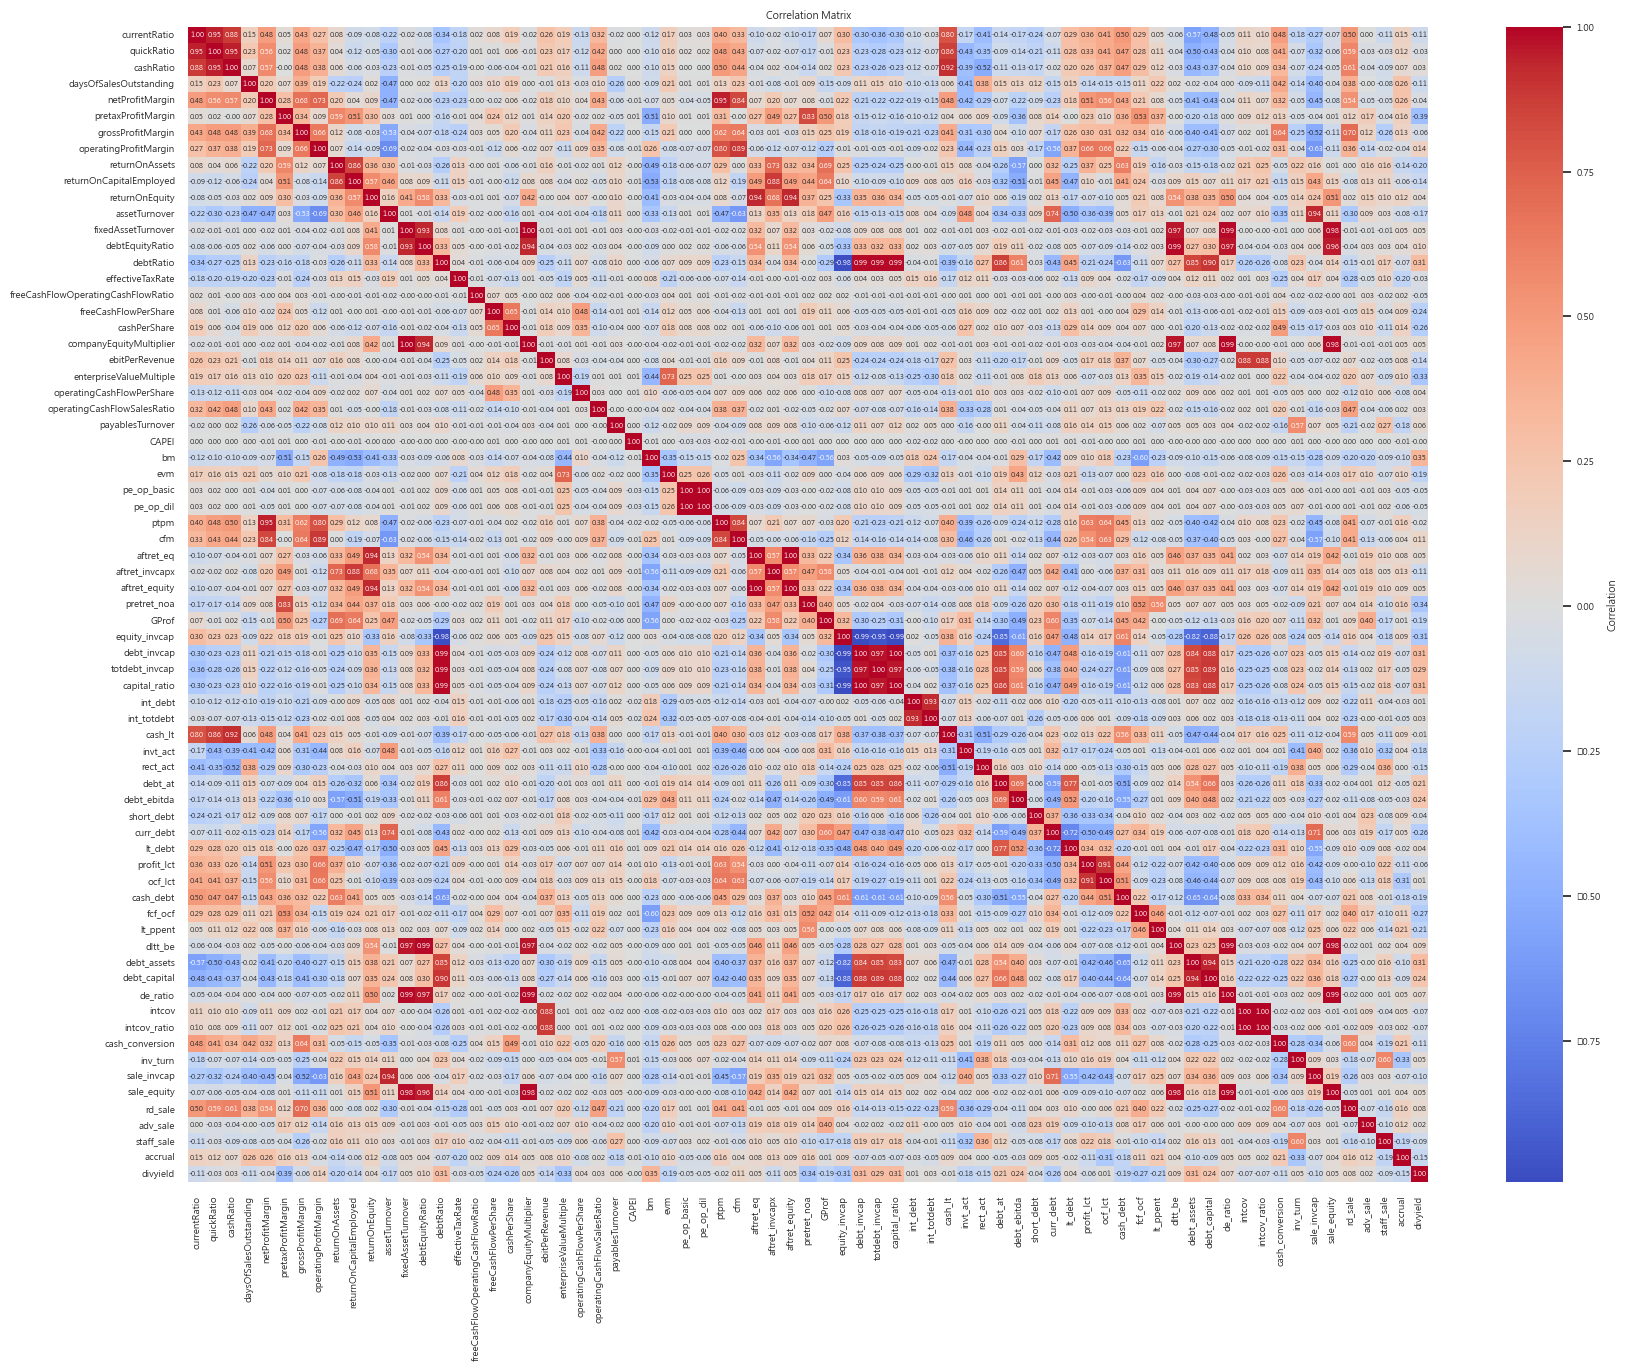

In [224]:

# 假設你有70個特徵
num_features = len(num_col)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data[num_col].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax, cbar_kws={'label': 'Correlation'}, annot_kws={'size': 5})
plt.title('Correlation Matrix')
plt.show()

可從上面看出離群職離平均超遠。

In [225]:
data[num_col].skew(axis=0)

currentRatio              2.378523
quickRatio                2.934934
cashRatio                 3.521932
daysOfSalesOutstanding    0.732588
netProfitMargin           1.237227
                            ...   
rd_sale                   2.066439
adv_sale                  3.375597
staff_sale                4.032360
accrual                  -0.547871
divyield                  0.756943
Length: 71, dtype: float64

可從上面看出充滿了極大或極小的極端值，使skew出現極大偏差

In [226]:
for c in num_col:

    q1 = data[c].quantile(0.25)
    q3 = data[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    lower_out = len(data.loc[(data[c] < fence_low)  ,c])
    upper_out = len(data.loc[(data[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(data)
    print(c, ": "+"{:.2%}".format(prop_out))

currentRatio : 3.91%
quickRatio : 7.47%
cashRatio : 9.54%
daysOfSalesOutstanding : 1.89%
netProfitMargin : 3.94%
pretaxProfitMargin : 1.92%
grossProfitMargin : 0.00%
operatingProfitMargin : 1.72%
returnOnAssets : 4.02%
returnOnCapitalEmployed : 5.42%
returnOnEquity : 7.27%
assetTurnover : 9.60%
fixedAssetTurnover : 11.46%
debtEquityRatio : 6.78%
debtRatio : 1.79%
effectiveTaxRate : 3.69%
freeCashFlowOperatingCashFlowRatio : 12.64%
freeCashFlowPerShare : 3.63%
cashPerShare : 11.54%
companyEquityMultiplier : 8.95%
ebitPerRevenue : 9.68%
enterpriseValueMultiple : 1.51%
operatingCashFlowPerShare : 6.06%
operatingCashFlowSalesRatio : 12.66%
payablesTurnover : 9.98%
CAPEI : 6.40%
bm : 7.52%
evm : 1.56%
pe_op_basic : 4.28%
pe_op_dil : 4.24%
ptpm : 4.42%
cfm : 2.77%
aftret_eq : 9.29%
aftret_invcapx : 6.32%
aftret_equity : 9.11%
pretret_noa : 3.96%
GProf : 5.38%
equity_invcap : 2.36%
debt_invcap : 2.07%
totdebt_invcap : 1.31%
capital_ratio : 2.59%
int_debt : 2.41%
int_totdebt : 1.63%
cash_lt : 

上面是outlers在不同column中的比例，不確定是不是一行中有很多outliers還是outliers各自散佈在不同row

In [227]:
data_outlier = data.copy()

for c in num_col:
    
    q1 = data_outlier[c].quantile(0.25)
    q3 = data_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    
    for i in range(len(data_outlier)):
        
        if data.loc[i,c] < fence_low or data.loc[i,c] > fence_high: # if Outlier
            
            data_outlier.loc[i,c] = 1
        
        else: # Not Outlier
            data_outlier.loc[i,c] = 0

<Axes: >

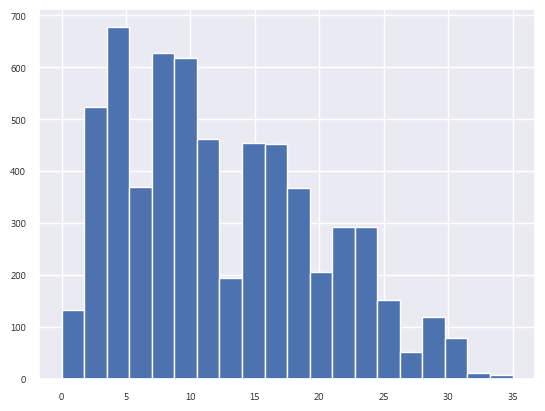

In [228]:
data_outlier["total"] = data_outlier[num_col].sum(axis=1)
data_outlier.total.hist(bins = 20)

In [229]:
del data_outlier

大部分的row都有outliers，而且離群值可能有用，所以我們只會將進行轉換，不會把離群值全部刪掉。

In [230]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data2 = data.copy()
for c in num_col:

    data2[c] = min_max_scaler.fit_transform(data[[c]].to_numpy())*1000
    data2[c] = data2[c].apply(lambda x: np.log10(x+0.01))

{'whiskers': [<matplotlib.lines.Line2D at 0x185171291d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1851712b750>,
 'boxes': [<matplotlib.lines.Line2D at 0x18514c21110>],
 'medians': [<matplotlib.lines.Line2D at 0x185142a2ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x185142a0190>],
 'means': []}

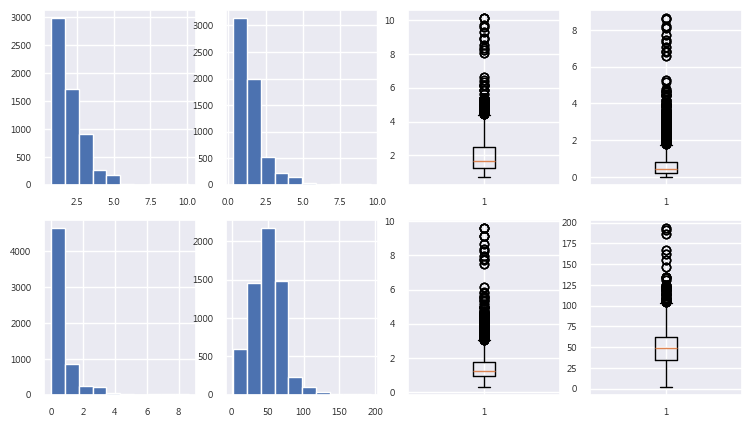

In [231]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(data[num_col[0]])
axes[0, 1].hist(data[num_col[1]])
axes[1, 0].hist(data[num_col[2]])
axes[1, 1].hist(data[num_col[3]])

axes[0, 2].boxplot(data[num_col[0]])
axes[1, 2].boxplot(data[num_col[1]])
axes[0, 3].boxplot(data[num_col[2]])
axes[1, 3].boxplot(data[num_col[3]])

{'whiskers': [<matplotlib.lines.Line2D at 0x1850f167bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1850fb45890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1850b6f7710>],
 'medians': [<matplotlib.lines.Line2D at 0x1850fb45cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1850fb46bd0>],
 'means': []}

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


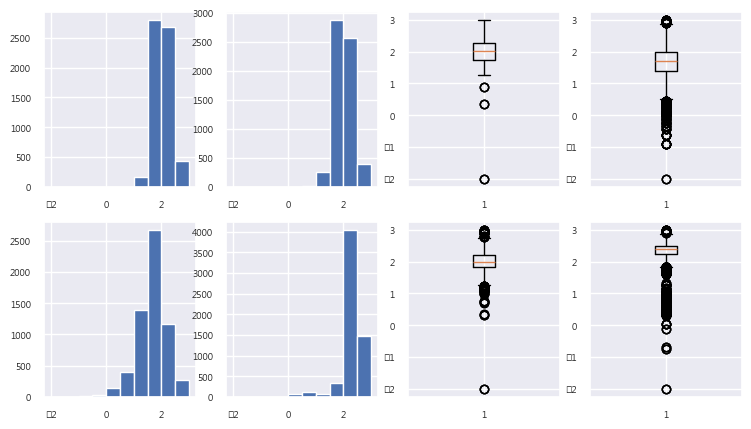

In [232]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(data2[num_col[0]])
axes[0, 1].hist(data2[num_col[1]])
axes[1, 0].hist(data2[num_col[2]])
axes[1, 1].hist(data2[num_col[3]])

axes[0, 2].boxplot(data2[num_col[0]])
axes[1, 2].boxplot(data2[num_col[1]])
axes[0, 3].boxplot(data2[num_col[2]])
axes[1, 3].boxplot(data2[num_col[3]])


data為處理前，data2為處理後，可看出仍然有極端的outliers。

現在要把處裡完的仍然有的outliers刪掉

In [233]:
data_no_ol = data2.copy()

for c in num_col:

    q05 = data_no_ol[c].quantile(0.10)
    q95 = data_no_ol[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    data_no_ol.loc[data_no_ol[c] > fence_high,c] = data_no_ol[c].quantile(0.25)
    data_no_ol.loc[data_no_ol[c] < fence_low,c] = data_no_ol[c].quantile(0.75)


{'whiskers': [<matplotlib.lines.Line2D at 0x185179aa910>,
 'caps': [<matplotlib.lines.Line2D at 0x18517972790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1850f93cd90>],
 'medians': [<matplotlib.lines.Line2D at 0x185179709d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18517972f10>],
 'means': []}

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


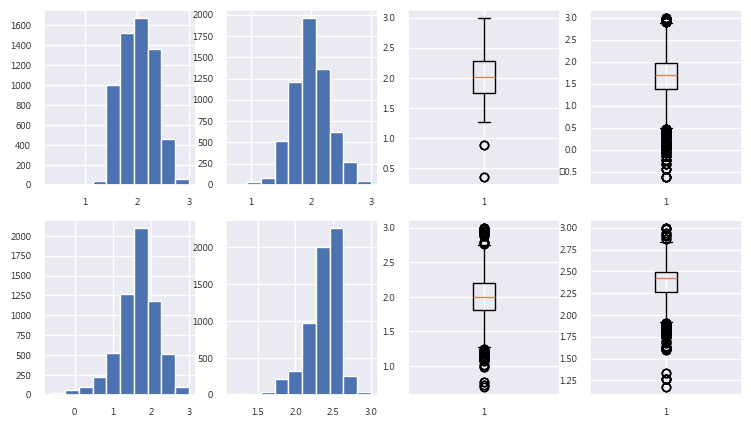

In [234]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(data_no_ol[num_col[0]])
axes[0, 1].hist(data_no_ol[num_col[1]])
axes[1, 0].hist(data_no_ol[num_col[2]])
axes[1, 1].hist(data_no_ol[num_col[3]])

axes[0, 2].boxplot(data_no_ol[num_col[0]])
axes[1, 2].boxplot(data_no_ol[num_col[1]])
axes[0, 3].boxplot(data_no_ol[num_col[2]])
axes[1, 3].boxplot(data_no_ol[num_col[3]])


把極端值刪掉後的結果

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


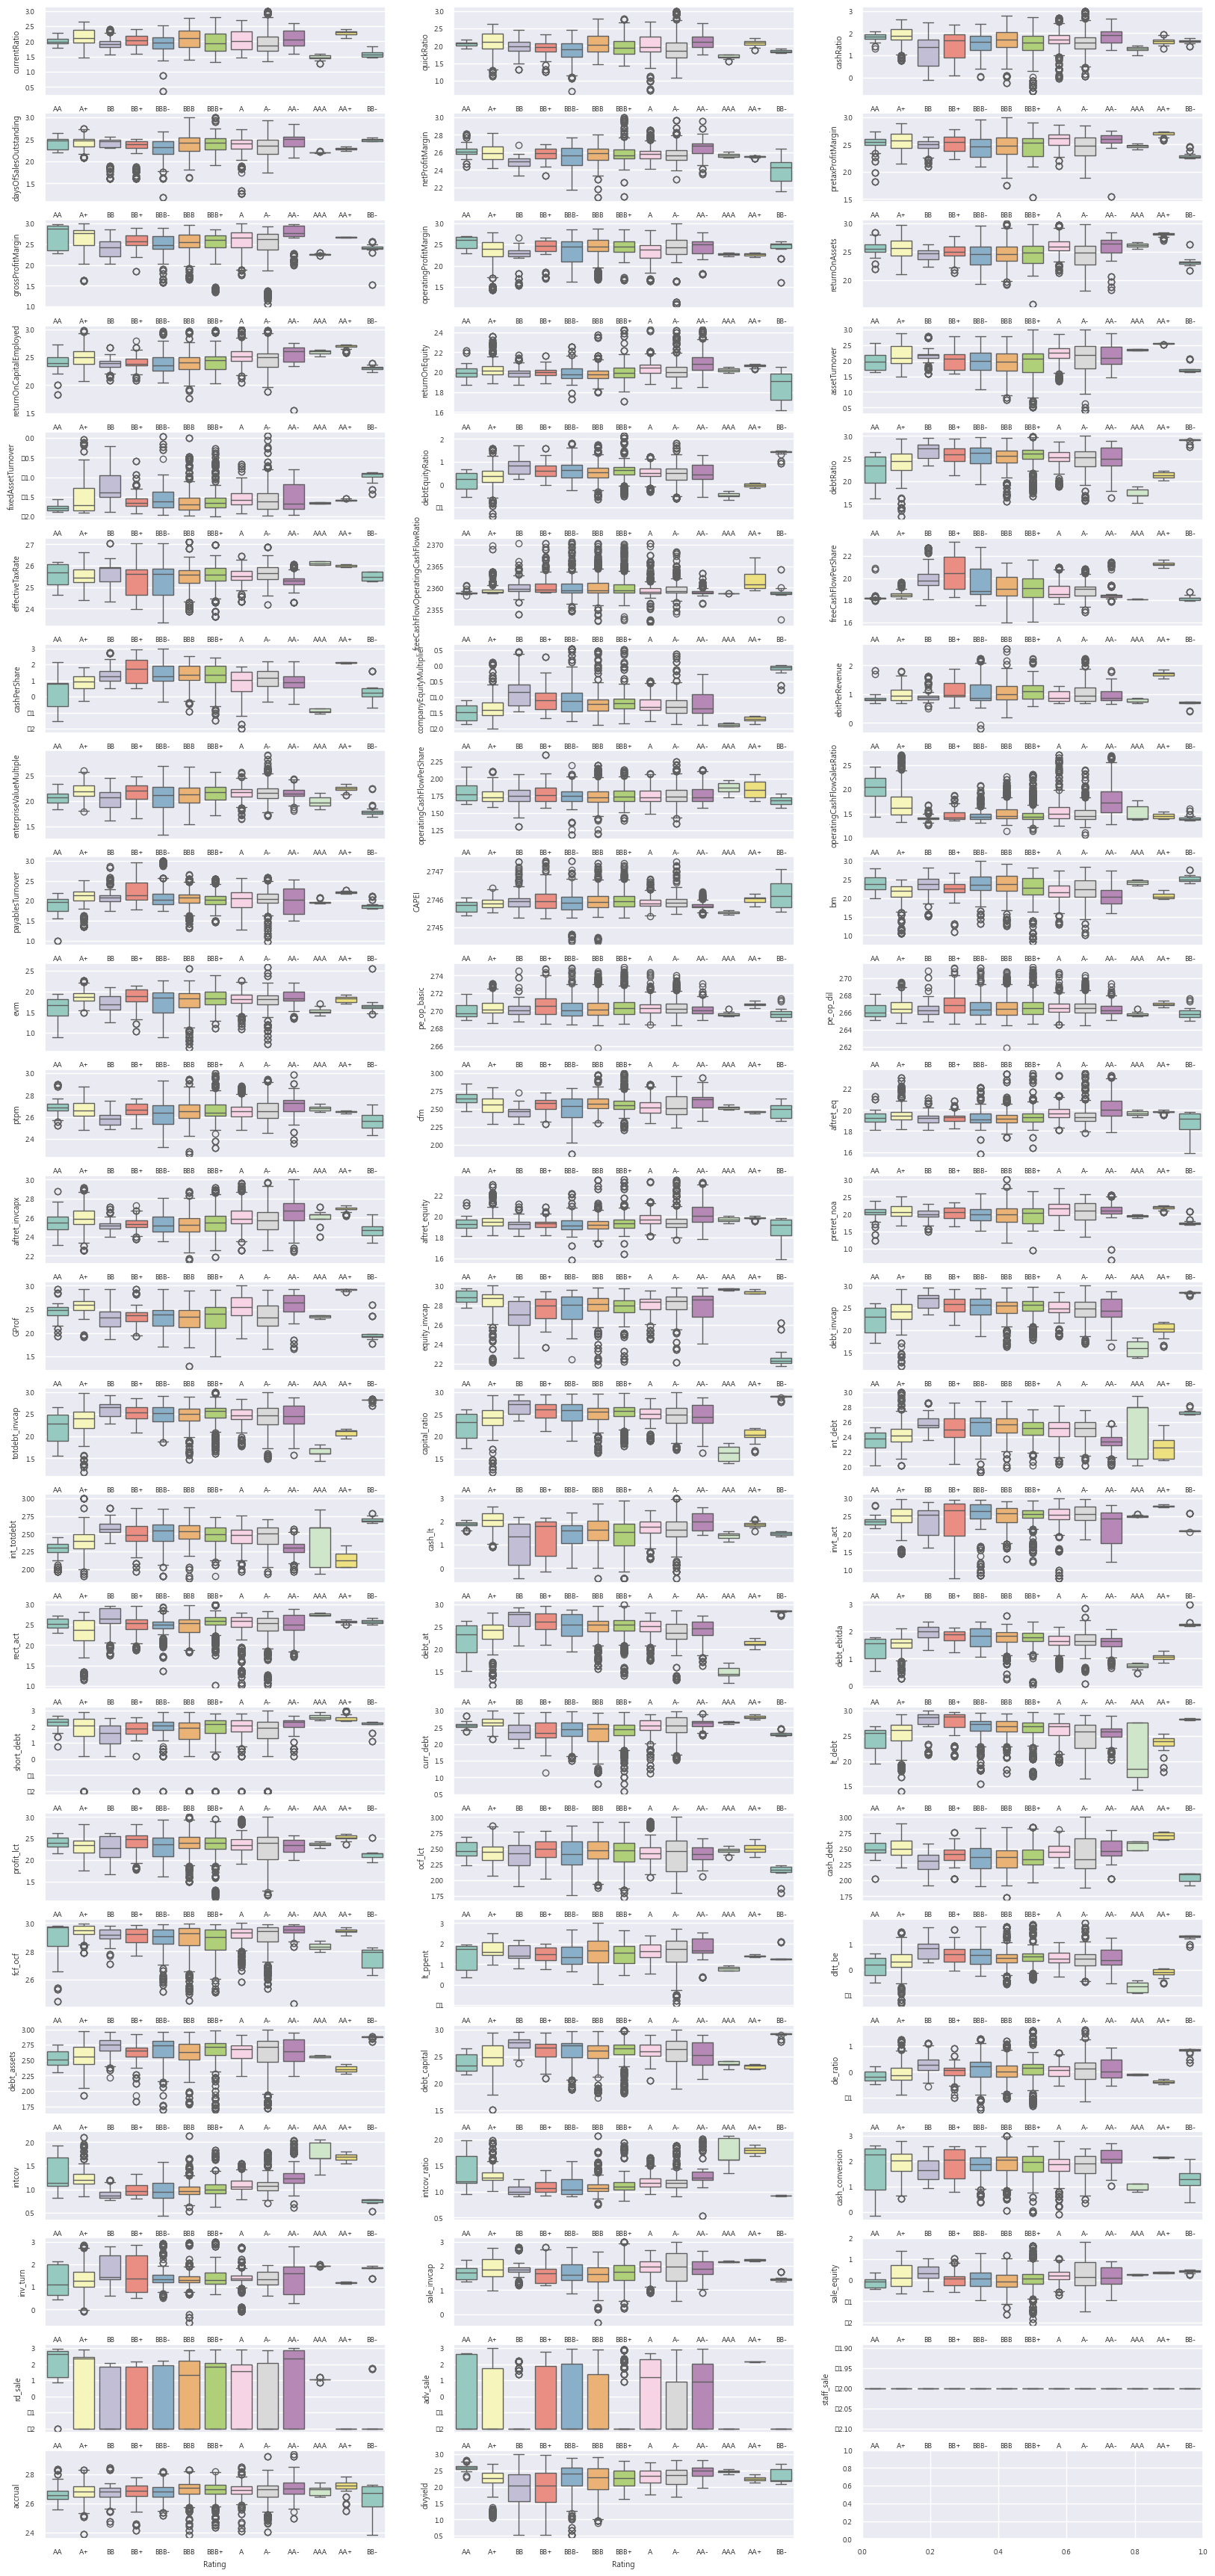

In [235]:
figure, axes = plt.subplots(nrows=len(num_col)//3 + 1, ncols=3, figsize=(20,44))

i = 0 
j = 0

for c in num_col:
    sns.boxplot(x=data_no_ol.Rating, y=data_no_ol[c], palette="Set3", ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1  

可看出有些feature的mean跟rating有相關性

# ML

In [236]:
df = data_no_ol.copy()

In [237]:
le = preprocessing.LabelEncoder()
#le.fit(df.Sector)
#df.Sector = le.transform(df.Sector) # encode sector
le.fit(df.Rating)
df.Rating = le.transform(df.Rating) # encode rating

In [238]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 1234)

In [239]:
X_train, y_train = df_train.iloc[:,4:], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,4:], df_test.iloc[:,0]

### Models

In [240]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector

In [241]:
score = pd.DataFrame(columns = ['Model', 'Accuracy Score'])

In [242]:
feature_names = X_train.columns 
def fi(feature_importance, name):
    sorted_indices = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k], reverse=True)
    data = {'Feature': [feature_names[idx] for idx in sorted_indices],
            'Importance': [feature_importance[idx] for idx in sorted_indices]}
    csv = pd.DataFrame(data)  
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=0.6)
    sns.barplot(x='Importance', y='Feature', data=data, palette='viridis')
    plt.title(f'Feature Importance Ranking of {name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
    csv.to_csv(f'../feature importance/{name}.csv', index = False)

In [243]:
# 假設你有一個預測的結果為 y_pred，是使用 LabelEncoder 編碼過的

def con(y_pred, model):
    # 計算混淆矩陣
    conf_mat = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))

    # 繪製熱度圖
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('預測值')
    plt.ylabel('實際值')
    plt.title(f'{model} 混淆矩陣')
    plt.show()

Logistic Regression (Stepwise Regression)

In [244]:
# sfs = SequentialFeatureSelector(linear_model.LogisticRegression(solver='sag', max_iter=1000),
#                                 k_features=df.iloc[:,4:].shape[1],
#                                 forward=True,
#                                 scoring='accuracy',
#                                 cv=None)
# selected_features = sfs.fit(df.iloc[:,4:], df.iloc[:,0])
# acc = pd.DataFrame(sfs.get_metric_dict()).transpose()
# selected_columns = acc.loc[acc['cv_scores'].idxmax(), 'feature_idx']

In [245]:
# # Split the data into train and test sets
# X_train_temp = X_train.iloc[:, list(selected_columns)]
# y_train_temp = y_train.copy()
# X_test_temp = X_test.iloc[:, list(selected_columns)]
# y_test_temp = y_test.copy()
 
# # Fit a logistic regression model using the selected features
# logreg = linear_model.LogisticRegression()
# logreg.fit(X_train_temp, y_train_temp)
 
# # Make predictions using the test set
# y_pred_LrSr = logreg.predict(X_test_temp)
 
# Accuracy_LrSr = metrics.accuracy_score(y_test_temp, y_pred_LrSr)
# score.loc[len(score)] = ['Logistic Regression (Stepwise Regression)', Accuracy_LrSr]
# print("LrSr Accuracy:",Accuracy_LrSr)

xgb

In [246]:
XGB_model = xgb.XGBClassifier(objective ='multi:softmax', num_class =4)
XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
score.loc[len(score)] = ['xgb', Accuracy_XGB]
print("XGB Accuracy:",Accuracy_XGB)

XGB Accuracy: 0.9745693191140279


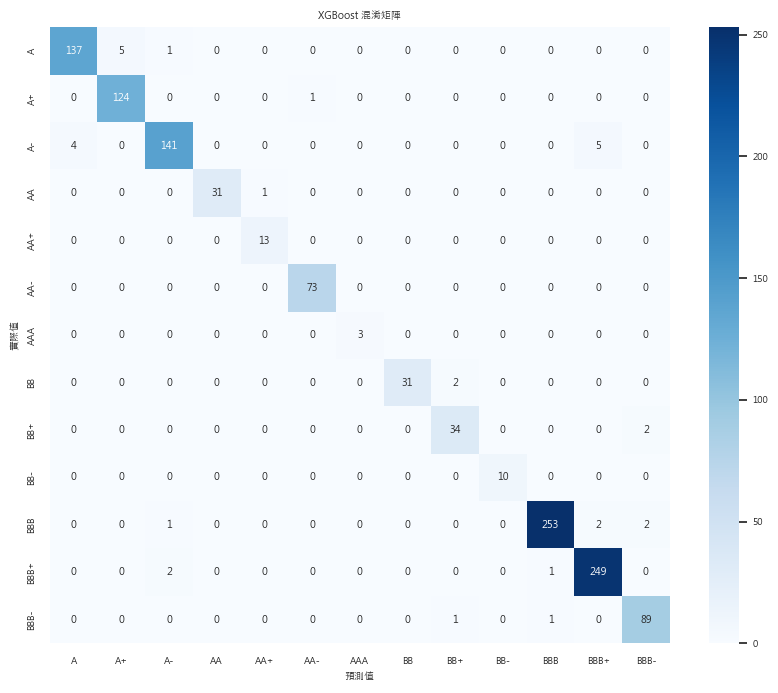

In [247]:
con(y_pred_XGB ,'XGBoost')

In [248]:
feature_importance = XGB_model.feature_importances_.copy()
sorted_indices = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k], reverse=True)
data = pd.DataFrame({'Feature': [feature_names[idx] for idx in sorted_indices],
        'Importance': [feature_importance[idx] for idx in sorted_indices]})

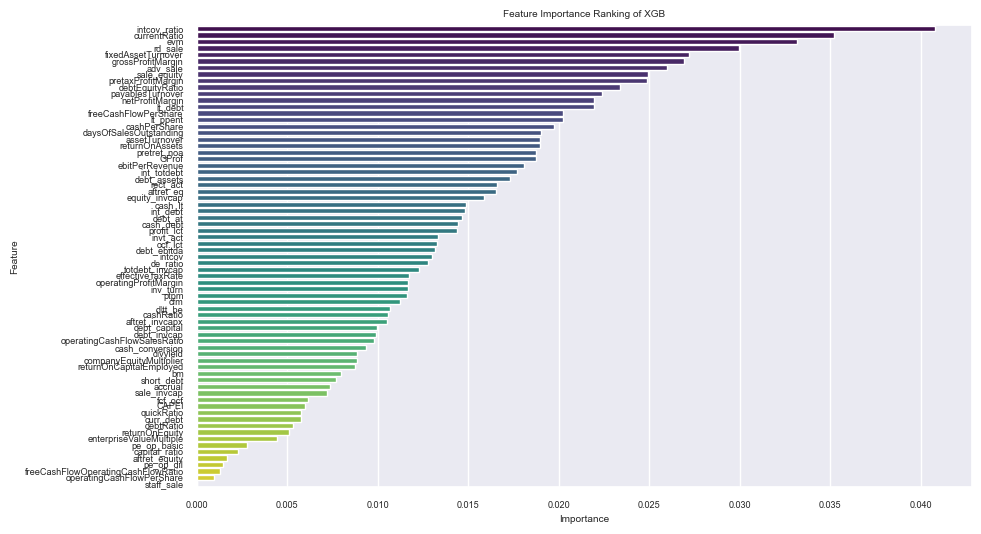

In [249]:
feature_importance = XGB_model.feature_importances_
fi(feature_importance, 'XGB')

Gradient Boosting Classifier

In [250]:
GBT_model = GradientBoostingClassifier(random_state=123)
GBT_model.fit(X_train, y_train)
y_pred_GBT = GBT_model.predict(X_test)
Accuracy_GBT = metrics.accuracy_score(y_test, y_pred_GBT)
score.loc[len(score)] = ['Gradient Boosting Classifier', Accuracy_GBT]
print("GBT Accuracy:",Accuracy_GBT)

GBT Accuracy: 0.9598031173092699


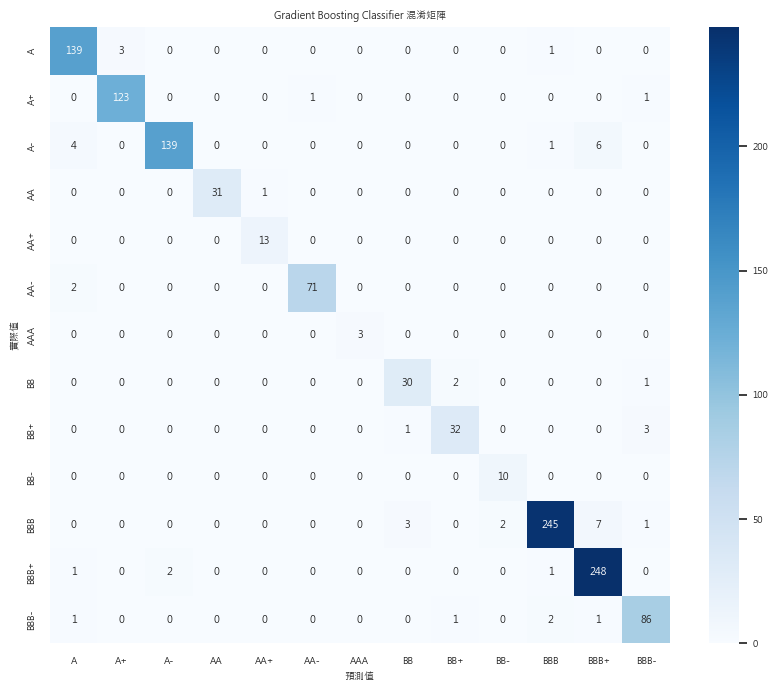

In [251]:
con(y_pred_GBT ,'Gradient Boosting Classifier')

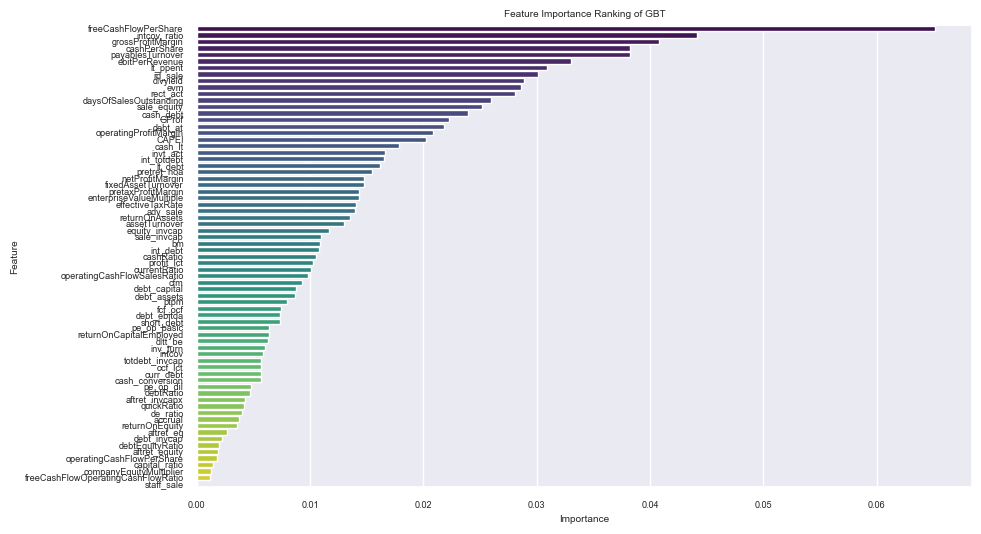

In [252]:
feature_importance = GBT_model.feature_importances_
fi(feature_importance, 'GBT')

Random Forest

In [253]:
RF_model = RandomForestClassifier(random_state=1234)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
score.loc[len(score)] = ['Random Forest', Accuracy_RF]
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.9745693191140279


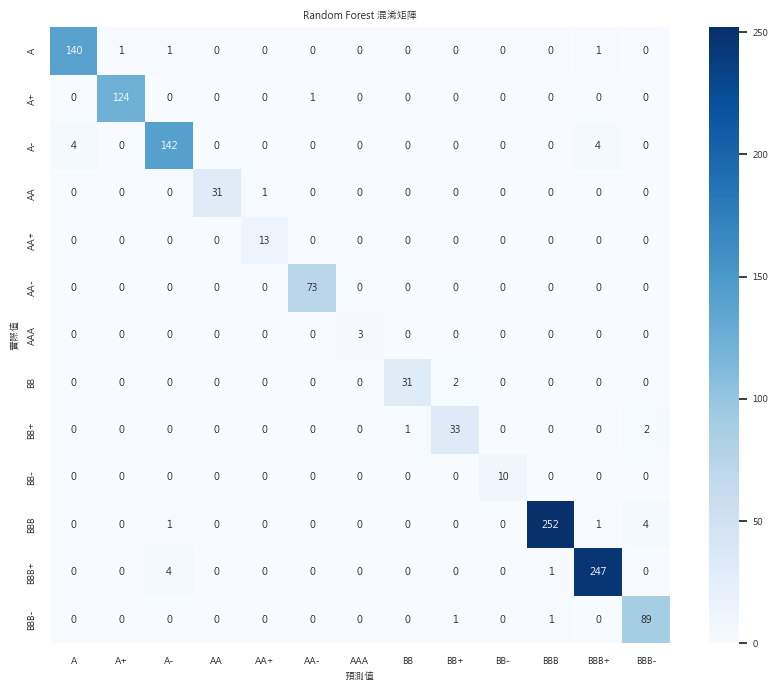

In [254]:
con(y_pred_RF ,'Random Forest')

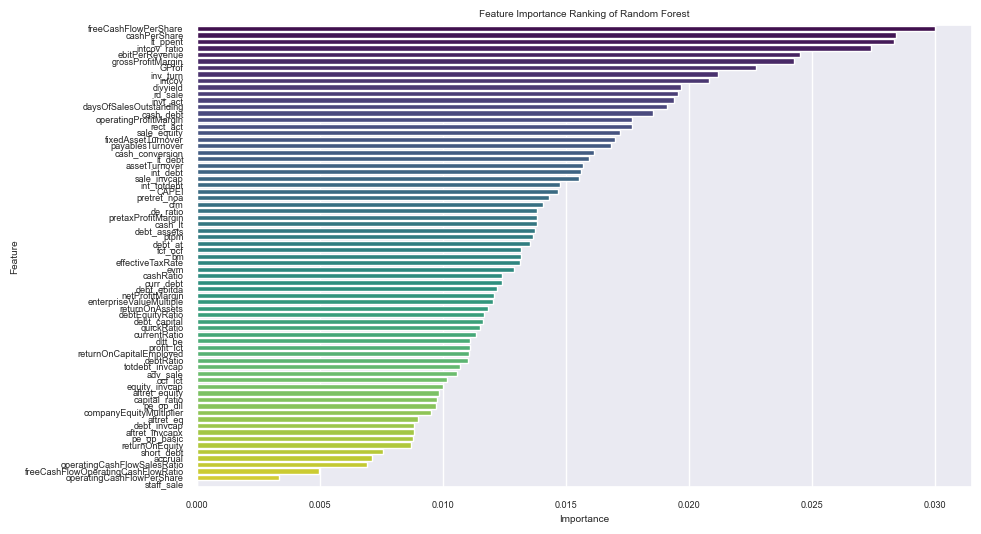

In [255]:
feature_importance = RF_model.feature_importances_
fi(feature_importance, 'Random Forest')

Support Vector Machine

In [256]:
SVC_model = svm.SVC(kernel='rbf', gamma= 2, C = 5, random_state=1234, probability=True)
SVC_model.fit(X_train, y_train)
y_pred_SVM = SVC_model.predict(X_test)
Accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
score.loc[len(score)] = ['Support Vector Machine', Accuracy_SVM]
print("SVM Accuracy:",Accuracy_SVM)

SVM Accuracy: 0.9688269073010665


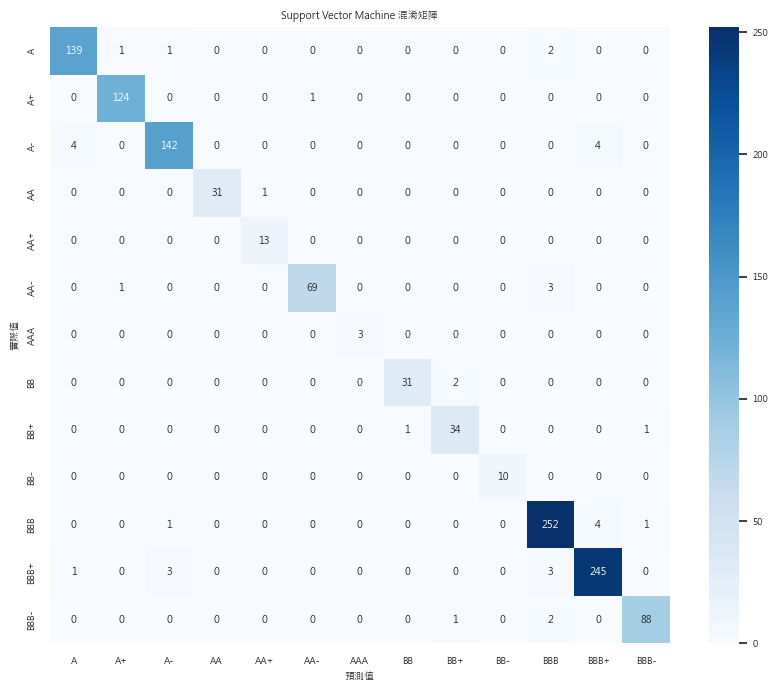

In [257]:
con(y_pred_SVM ,'Support Vector Machine')

Neural Network

In [258]:
MLP_model = MLPClassifier(hidden_layer_sizes=(100, 100, 50), activation='logistic', solver='adam', max_iter=10000)
MLP_model.fit(X_train, y_train)
y_pred_MLP = MLP_model.predict(X_test)
Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
score.loc[len(score)] = ['Neural Network', Accuracy_MLP]
print("MLP Accuracy:",Accuracy_MLP)

MLP Accuracy: 0.815422477440525


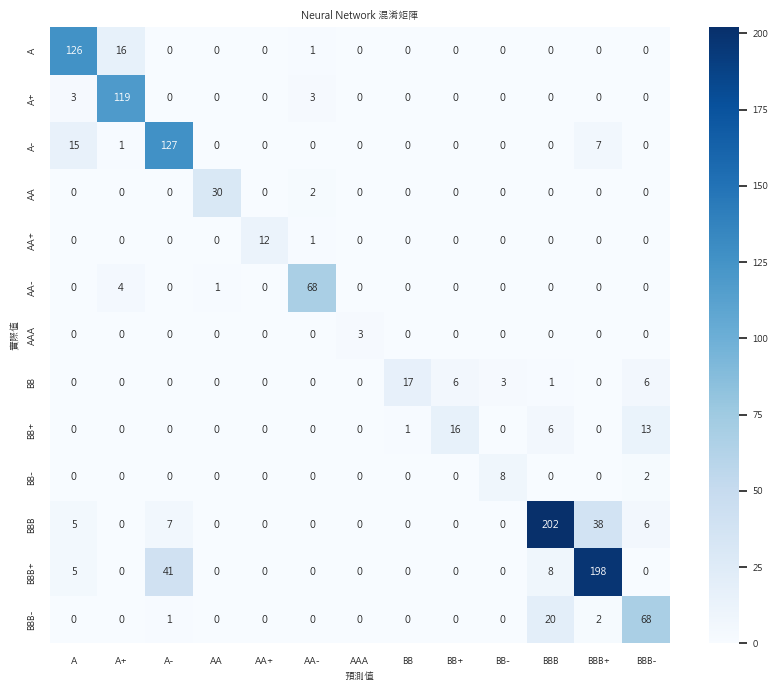

In [259]:
con(y_pred_MLP ,'Neural Network')

Naive Bayes

In [260]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
y_pred_GNB = GNB_model.predict(X_test)
Accuracy_GNB = metrics.accuracy_score(y_test, y_pred_GNB)
score.loc[len(score)] = ['Naive Bayes', Accuracy_GNB]
print("GNB Accuracy:",Accuracy_GNB)

GNB Accuracy: 0.4413453650533224


Linear Discriminant Analysis

In [261]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
Accuracy_LDA = metrics.accuracy_score(y_test, y_pred_LDA)
score.loc[len(score)] = ['Linear Discriminant Analysis', Accuracy_LDA]
print("LDA Accuracy:",Accuracy_LDA)

LDA Accuracy: 0.6349466776045939


Quadratic Discriminant Analysis

In [262]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train,y_train)
y_pred_QDA = QDA_model.predict(X_test)
Accuracy_QDA = metrics.accuracy_score(y_test, y_pred_QDA)
score.loc[len(score)] = ['Quadratic Discriminant Analysis', Accuracy_QDA]
print("QDA Accuracy:",Accuracy_QDA)

QDA Accuracy: 0.8638228055783429


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


K Nearest Neighbours

In [263]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
score.loc[len(score)] = ['K Nearest Neighbours', Accuracy_KNN]
print("KNN Accuracy:",Accuracy_KNN)

KNN Accuracy: 0.9606234618539786


Logistic Regression

In [264]:
LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
score.loc[len(score)] = ['Logistic Regression', Accuracy_LR]
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.6669401148482362


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [265]:
models = [
    ('xgb', XGB_model),
    ('Random Forest', RF_model),
    ('Gradient Boosting', GBT_model),
    ('K Nearest Neighbours', KNN_model),
    ('Linear Discriminant Analysis', LDA_model),
    ('Support Vector Machine', SVC_model),
    ('Naive Bayes', GNB_model),
    ('Quadratic Discriminant Analysis', QDA_model),
    ('Logistic Regression', LR_model),
    ('Neural Network', MLP_model)
]

In [266]:
models2 = [
    ('xgb', XGB_model),
    ('Random Forest', RF_model),
    ('Support Vector Machine', SVC_model),
]

Voting (Hard)

In [267]:
from sklearn.ensemble import VotingClassifier

VOT_clf = VotingClassifier(estimators=models, voting='hard')  
VOT_clf.fit(X_train, y_train)  
y_pred_VOT = VOT_clf.predict(X_test)
Accuracy_VOT = metrics.accuracy_score(y_test, y_pred_VOT)
score.loc[len(score)] = ['Voting_hard', Accuracy_VOT]
print("VOT Accuracy:",Accuracy_VOT)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


VOT Accuracy: 0.970467596390484


In [268]:
from sklearn.ensemble import VotingClassifier

VOT_clf3 = VotingClassifier(estimators=models2, voting='hard')  
VOT_clf3.fit(X_train, y_train)  
y_pred_VOT3 = VOT_clf3.predict(X_test)
Accuracy_VOT3 = metrics.accuracy_score(y_test, y_pred_VOT3)
score.loc[len(score)] = ['Voting_hard_v2', Accuracy_VOT3]
print("VOT Accuracy v2:",Accuracy_VOT)

VOT Accuracy v2: 0.970467596390484


Voting (Soft)

In [269]:
VOT_clf2 = VotingClassifier(estimators=models, voting='soft')  
VOT_clf2.fit(X_train, y_train)  
y_pred_VOT2 = VOT_clf2.predict(X_test)
Accuracy_VOT2 = metrics.accuracy_score(y_test, y_pred_VOT2)
score.loc[len(score)] = ['Voting_soft', Accuracy_VOT2]
print("VOT2 Accuracy:",Accuracy_VOT2)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


VOT2 Accuracy: 0.977850697292863


In [270]:
VOT_clf4 = VotingClassifier(estimators=models2, voting='soft')  
VOT_clf4.fit(X_train, y_train)  
y_pred_VOT4 = VOT_clf4.predict(X_test)
Accuracy_VOT4 = metrics.accuracy_score(y_test, y_pred_VOT4)
score.loc[len(score)] = ['Voting_soft_v2', Accuracy_VOT4]
print("VOT2 Accuracy v2:",Accuracy_VOT4)

VOT2 Accuracy v2: 0.9753896636587367


Stacking

In [271]:
from sklearn.ensemble import StackingClassifier
STA_clf = StackingClassifier(estimators=models)
STA_clf.fit(X_train, y_train)  
y_pred_STA = STA_clf.predict(X_test)
Accuracy_STA = metrics.accuracy_score(y_test, y_pred_STA)
score.loc[len(score)] = ['Stacking', Accuracy_STA]
print("STA Accuracy:",Accuracy_STA)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\USER\AppData\Local\Program

STA Accuracy: 0.9721082854799016


In [272]:
from sklearn.ensemble import StackingClassifier
STA_clf2 = StackingClassifier(estimators=models2)
STA_clf2.fit(X_train, y_train)  
y_pred_STA2 = STA_clf2.predict(X_test)
Accuracy_STA2 = metrics.accuracy_score(y_test, y_pred_STA2)
score.loc[len(score)] = ['Stacking v2', Accuracy_STA2]
print("STA Accuracy v2:",Accuracy_STA2)

STA Accuracy v2: 0.9745693191140279


Compare

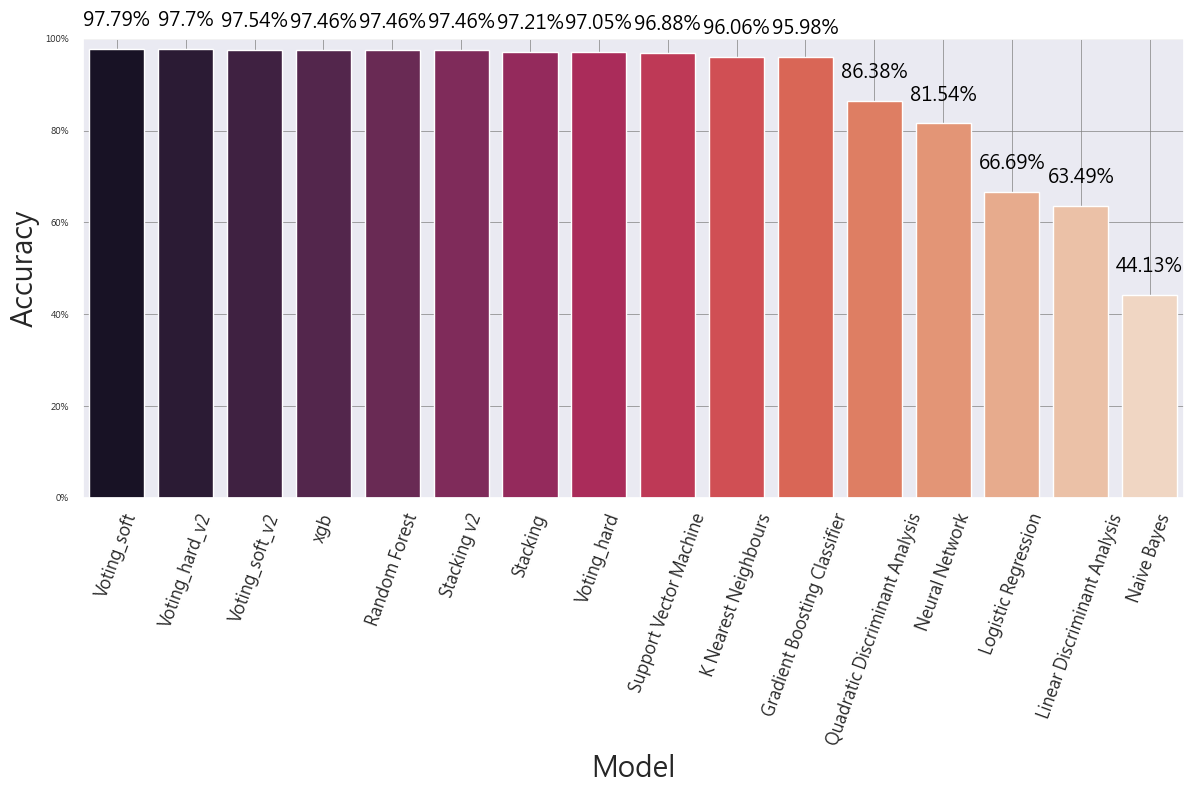

In [273]:
order = list(score.sort_values('Accuracy Score', ascending=False).Model)
score = score.sort_values('Accuracy Score', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy Score", data=score, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(score)):
    plt.text(x = i, y = score.loc[i, 'Accuracy Score'] + 0.05, s = str(round((score.loc[i, 'Accuracy Score'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()